In [25]:
"""
Test concatenation-based clustering on Lichens data
"""
import sys
import os
from pathlib import Path

# Add parent directory to path
sys.path.append(r'C:\Users\meloy\PycharmProjects\Capstone')

from wavelength_analysis.concatenation_clustering import (
    load_masked_data,
    concatenate_hyperspectral_data,
    perform_clustering,
    reconstruct_cluster_map,
    visualize_clustering_results
)

# Set up paths
base_dir = Path(r"C:\Users\meloy\PycharmProjects\Capstone")
data_path = base_dir / "data" / "processed" / "Lichens" / "lichens_data_masked.pkl"
output_dir = base_dir / "wavelength_analysis" / "concatenation_results"
output_dir.mkdir(parents=True, exist_ok=True)

print("Loading masked data...")
data_dict = load_masked_data(data_path)

Loading masked data...


In [26]:
# Concatenate the hyperspectral data
print("\nConcatenating hyperspectral data...")
df, valid_mask, metadata = concatenate_hyperspectral_data(
    data_dict,
    normalize=True,
    scale=True
)


Concatenating hyperspectral data...
Starting data concatenation...
Found 8 excitation wavelengths: [310.0, 325.0, 340.0, 365.0, 385.0, 400.0, 415.0, 430.0]
Spatial dimensions: 1040 x 1392
Finding valid pixels...
Found 573687 valid pixels out of 1447680 total (39.6%)
Concatenating spectral data...
Created DataFrame with shape: (573687, 194)
  - 573687 pixels (rows)
  - 194 features (columns): 2 coordinates + 192 spectral features
Applying standard scaling to spectral features...


In [27]:
# Check the resulting dataframe
print(f"\nDataFrame shape: {df.shape}")
print(f"Columns (first 10): {df.columns[:10].tolist()}")
print(f"\nFirst few rows:")
df.head()


DataFrame shape: (573687, 194)
Columns (first 10): ['x', 'y', 'ex_310_em_420', 'ex_310_em_430', 'ex_310_em_440', 'ex_310_em_450', 'ex_310_em_460', 'ex_310_em_470', 'ex_310_em_480', 'ex_310_em_490']

First few rows:


,x,y,ex_310_em_420,ex_310_em_430,ex_310_em_440,ex_310_em_450,ex_310_em_460,ex_310_em_470,ex_310_em_480,ex_310_em_490,...,ex_430_em_590,ex_430_em_600,ex_430_em_610,ex_430_em_620,ex_430_em_630,ex_430_em_640,ex_430_em_650,ex_430_em_660,ex_430_em_670,ex_430_em_680
0,876.0,96.0,-0.814015,-0.381741,-1.223645,-1.314766,-1.119819,-1.412864,-1.342890,-1.189002,...,-1.492040,-1.342486,-1.354139,-1.388672,-1.660108,-1.806113,-2.026960,-1.849108,-1.623793,-1.451354
1,874.0,97.0,-0.814015,-0.216162,-0.848600,-1.314766,-1.393601,-1.319533,-0.988572,-1.398503,...,-1.553846,-1.471602,-1.394440,-1.483399,-1.742070,-1.901362,-1.962692,-1.812080,-1.638052,-1.509206
2,875.0,97.0,0.209854,-0.812247,-0.888079,-0.631690,-1.142634,-1.049910,-1.401943,-1.276294,...,-1.485534,-1.422153,-1.405955,-1.512298,-1.634121,-1.953521,-2.016249,-1.963897,-1.615238,-1.544560
3,876.0,97.0,-0.814015,-1.010942,-1.045992,-1.314766,-1.393601,-0.790657,-1.185415,-1.398503,...,-1.576617,-1.507316,-1.443377,-1.549225,-1.728076,-1.953521,-1.871647,-1.915760,-1.578164,-1.417608
4,877.0,97.0,-0.395160,0.578618,-1.223645,-1.147791,-1.393601,-1.350643,-1.401943,-1.346128,...,-1.560352,-1.400176,-1.357018,-1.441655,-1.686096,-1.835595,-1.927881,-1.823188,-1.498312,-1.509206


In [28]:
# Perform clustering with k=5
k = 5
print(f"\nPerforming KMeans clustering with k={k}...")
labels, metrics = perform_clustering(
    df,
    n_clusters=k,
    method='kmeans',
    use_pca=False
)

print(f"\nClustering completed!")
print(f"Metrics: {metrics}")


Performing KMeans clustering with k=5...

Performing kmeans clustering with 5 clusters...
Clustering on 573687 samples with 192 features
Running KMeans...
KMeans inertia: 30009681.79
Calculating clustering metrics...
Silhouette Score: 0.2937
Davies-Bouldin Score: 1.1087
Calinski-Harabasz Score: 382991.97

Cluster distribution:
  Cluster 0: 14685 pixels (2.6%)
  Cluster 1: 48101 pixels (8.4%)
  Cluster 2: 225677 pixels (39.3%)
  Cluster 3: 179182 pixels (31.2%)
  Cluster 4: 106042 pixels (18.5%)

Clustering completed!
Metrics: {'silhouette_score': np.float64(0.293684822004887), 'davies_bouldin_score': np.float64(1.1086873829620771), 'calinski_harabasz_score': np.float64(382991.97127647884), 'inertia': 30009681.78577576, 'cluster_centers': array([[-5.57430940e-02, -1.44290171e-01, -2.54595518e-01,
        -3.02143217e-01, -3.31280722e-01, -3.25708154e-01,
        -3.06994757e-01, -2.87857597e-01, -2.60936533e-01,
        -2.19027787e-01, -1.81508452e-01, -1.52483459e-01,
        -1.2585

In [29]:
# Reconstruct the 2D cluster map
import numpy as np
print("\nReconstructing cluster map...")
cluster_map = reconstruct_cluster_map(labels, df, valid_mask, metadata)

print(f"Cluster map shape: {cluster_map.shape}")
print(f"Unique clusters: {np.unique(cluster_map)}")


Reconstructing cluster map...
Cluster map shape: (1040, 1392)
Unique clusters: [-1  0  1  2  3  4]



Creating visualization...
Visualization saved to C:\Users\meloy\PycharmProjects\Capstone\wavelength_analysis\concatenation_results\clustering_results_k5.png


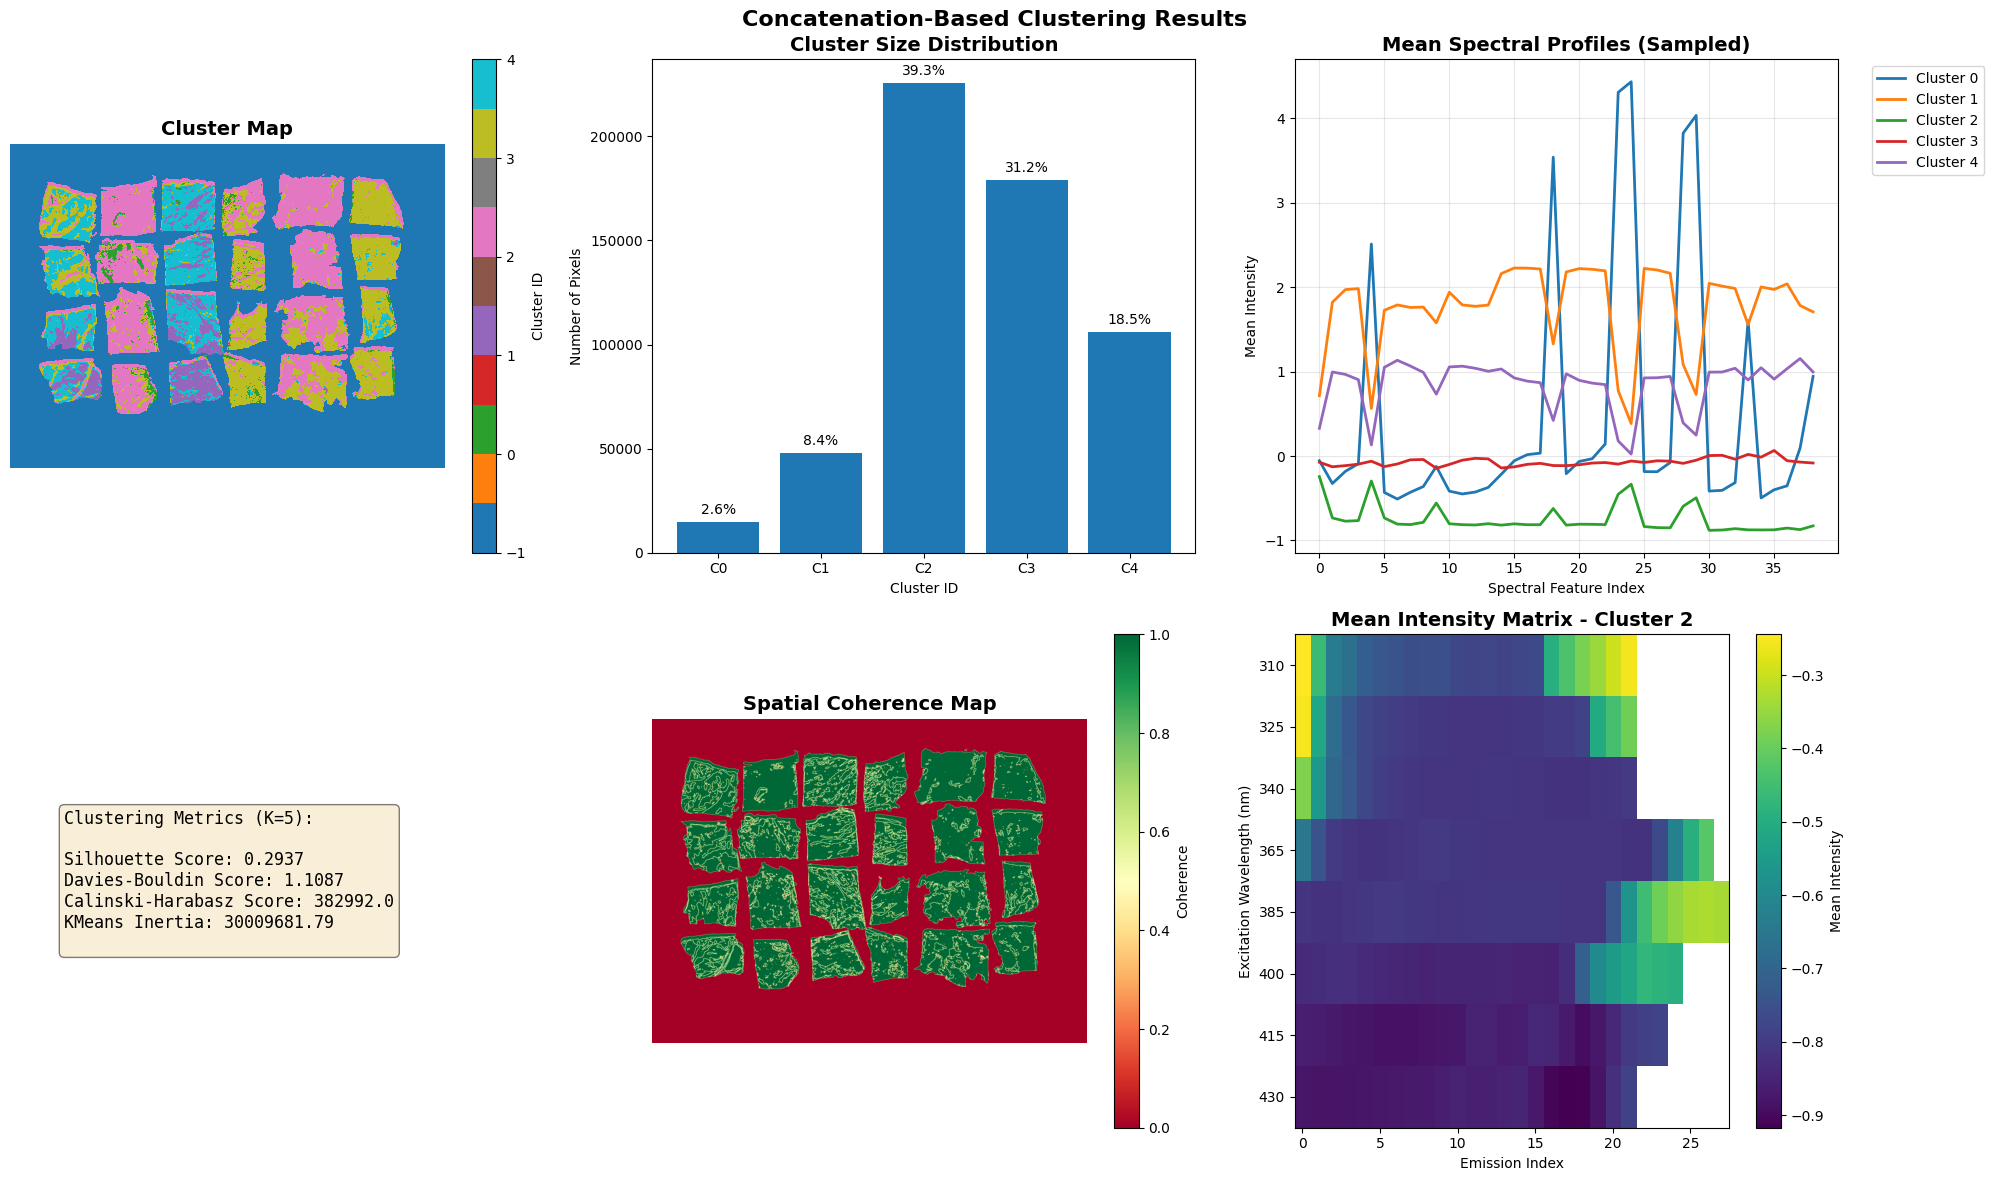

In [30]:
import numpy as np

# Visualize the clustering results
print("\nCreating visualization...")
vis_path = output_dir / f"clustering_results_k{k}.png"
visualize_clustering_results(
    cluster_map,
    df,
    labels,
    metadata,
    metrics,
    save_path=vis_path
)


Comparing different k values...

Testing k = 3

Performing kmeans clustering with 3 clusters...
Clustering on 573687 samples with 192 features
Running KMeans...
KMeans inertia: 39543035.79
Calculating clustering metrics...
Silhouette Score: 0.3456
Davies-Bouldin Score: 1.0595
Calinski-Harabasz Score: 512162.12

Cluster distribution:
  Cluster 0: 274526 pixels (47.9%)
  Cluster 1: 116415 pixels (20.3%)
  Cluster 2: 182746 pixels (31.9%)

Testing k = 4

Performing kmeans clustering with 4 clusters...
Clustering on 573687 samples with 192 features
Running KMeans...
KMeans inertia: 34485110.43
Calculating clustering metrics...
Silhouette Score: 0.3546
Davies-Bouldin Score: 0.9668
Calinski-Harabasz Score: 419567.30

Cluster distribution:
  Cluster 0: 172213 pixels (30.0%)
  Cluster 1: 272753 pixels (47.5%)
  Cluster 2: 113399 pixels (19.8%)
  Cluster 3: 15322 pixels (2.7%)

Testing k = 5

Performing kmeans clustering with 5 clusters...
Clustering on 573687 samples with 192 features
Running

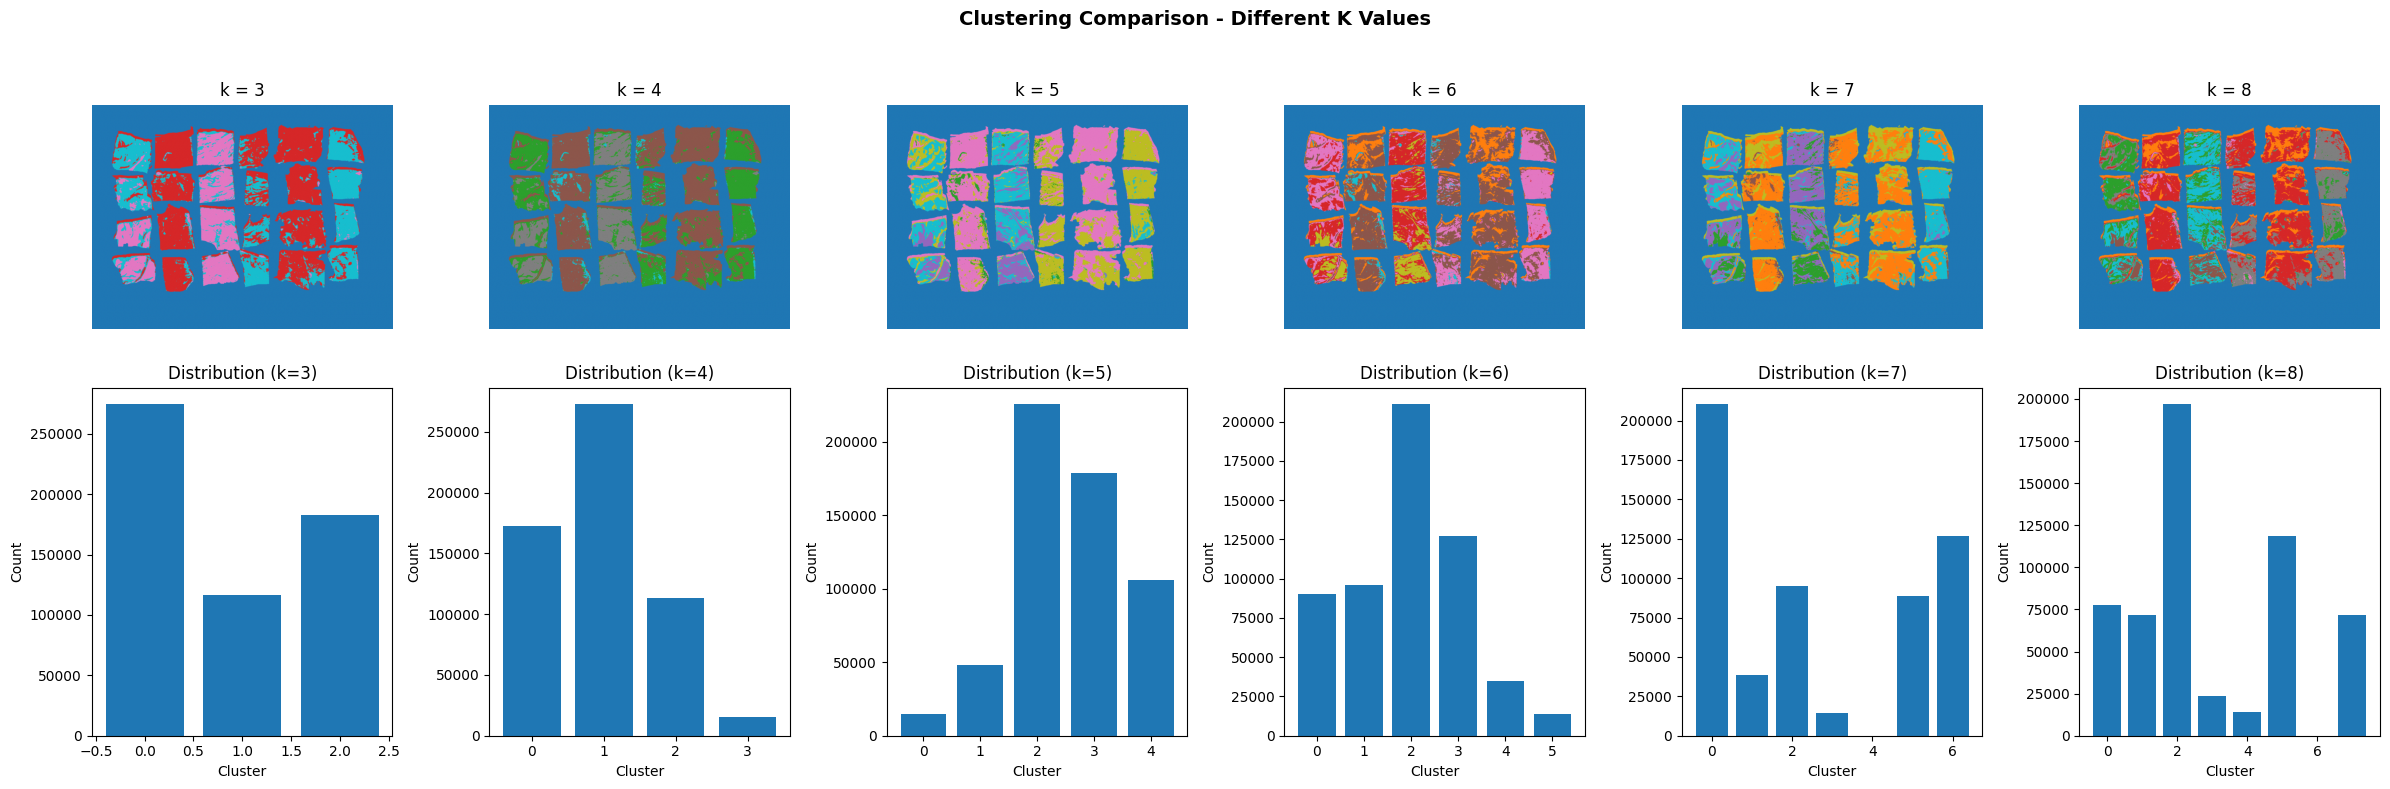

Saved metrics comparison to C:\Users\meloy\PycharmProjects\Capstone\wavelength_analysis\concatenation_results\k_comparison_metrics.png


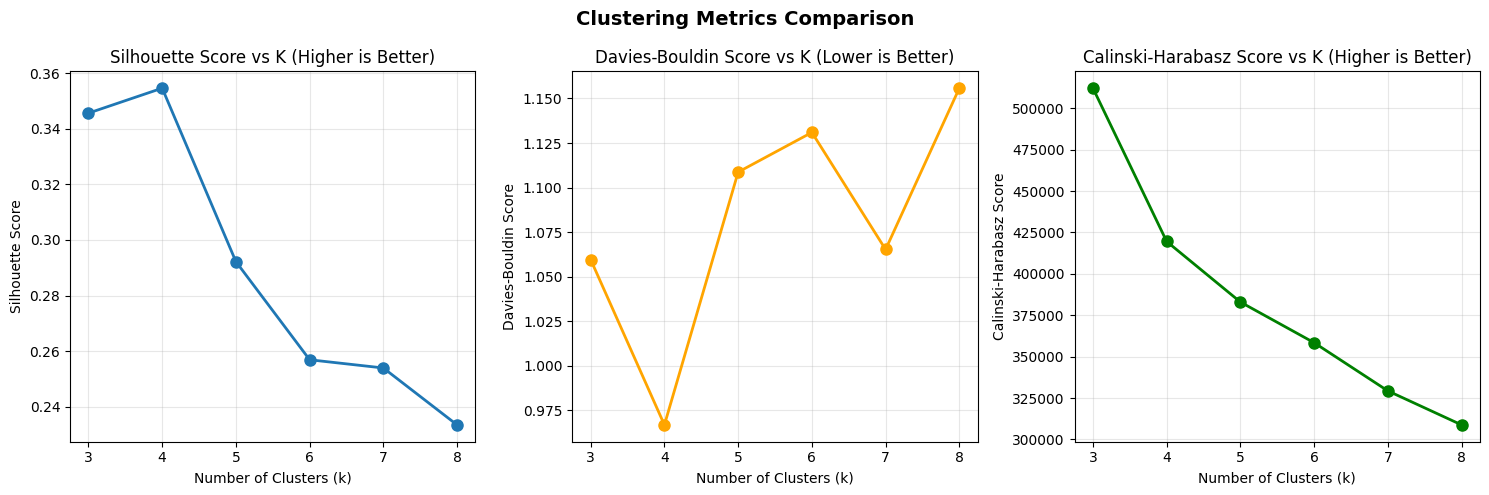


Optimal k based on Silhouette Score: 4


In [31]:
# Compare different k values
from wavelength_analysis.concatenation_clustering import compare_clustering_k_values

print("\nComparing different k values...")
k_values = [3, 4, 5, 6, 7, 8]
comparison_results = compare_clustering_k_values(
    df,
    valid_mask,
    metadata,
    k_values=k_values,
    save_dir=output_dir
)

## Analysis Summary

The concatenation-based clustering approach:
1. **Loads masked hyperspectral data** from pkl files
2. **Concatenates spectral features** across all excitation-emission pairs for each valid pixel
3. **Applies KMeans clustering** to group pixels with similar spectral signatures
4. **Visualizes results** with cluster maps and spectral profiles
5. **Compares different k values** to find optimal clustering

This method provides a baseline for comparing with more complex NN-based approaches.

## Ground Truth Validation

Now let's validate our clustering results against the ground truth from the colored PNG annotation file.

In [32]:
# Import ground truth validation functions
from ground_truth_validation import (
    extract_ground_truth_from_png,
    calculate_clustering_accuracy,
    visualize_clustering_vs_ground_truth
)

# Extract ground truth from PNG
png_path = r"C:\Users\meloy\Downloads\Mask_Manual.png"
background_colors = [
    (24, 24, 24, 255),      # Dark gray background
    (168, 168, 168, 255)    # Light gray background
]

print("Extracting ground truth labels from PNG...")
ground_truth, color_mapping, lichen_colors = extract_ground_truth_from_png(
    png_path,
    background_colors=background_colors,
    target_shape=(1040, 1392)  # Match your data dimensions
)

print(f"Number of lichen types found: {len(lichen_colors)}")

Extracting ground truth labels from PNG...
Original PNG shape: (1024, 1392)
Resized to: (1040, 1392)
Found 8 unique colors in the PNG
Found 6 lichen type colors (excluding background)

Ground Truth Statistics:
  Shape: (1040, 1392)
  Number of lichen types: 6
  Type 0 (color (np.uint8(48), np.uint8(48), np.uint8(48), np.uint8(255))): 104162 pixels (7.20%)
  Type 1 (color (np.uint8(72), np.uint8(72), np.uint8(72), np.uint8(255))): 69258 pixels (4.78%)
  Type 2 (color (np.uint8(96), np.uint8(96), np.uint8(96), np.uint8(255))): 123960 pixels (8.56%)
  Type 3 (color (np.uint8(120), np.uint8(120), np.uint8(120), np.uint8(255))): 95261 pixels (6.58%)
  Type 4 (color (np.uint8(144), np.uint8(144), np.uint8(144), np.uint8(255))): 101597 pixels (7.02%)
  Type 5 (color (np.uint8(217), np.uint8(217), np.uint8(217), np.uint8(255))): 79449 pixels (5.49%)
  Background: 873993 pixels (60.37%)
Number of lichen types found: 6


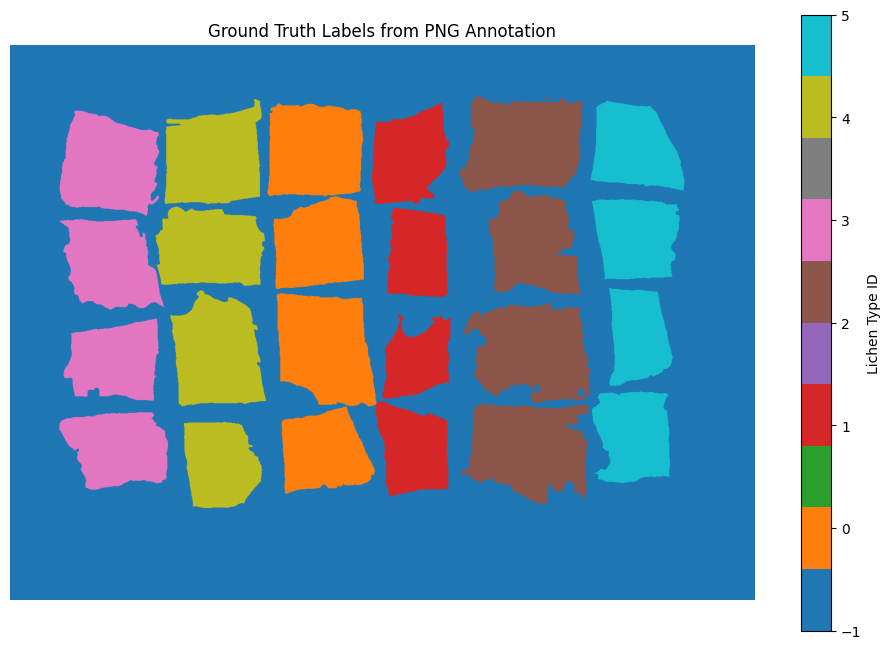


Color mapping:
  Lichen type 0: RGB(np.uint8(48), np.uint8(48), np.uint8(48))
  Lichen type 1: RGB(np.uint8(72), np.uint8(72), np.uint8(72))
  Lichen type 2: RGB(np.uint8(96), np.uint8(96), np.uint8(96))
  Lichen type 3: RGB(np.uint8(120), np.uint8(120), np.uint8(120))
  Lichen type 4: RGB(np.uint8(144), np.uint8(144), np.uint8(144))
  Lichen type 5: RGB(np.uint8(217), np.uint8(217), np.uint8(217))


In [33]:
# Visualize ground truth
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.imshow(ground_truth, cmap='tab10')
plt.colorbar(label='Lichen Type ID')
plt.title('Ground Truth Labels from PNG Annotation')
plt.axis('off')
plt.show()

# Print color mapping
print("\nColor mapping:")
for label, color in color_mapping.items():
    if label >= 0:
        print(f"  Lichen type {label}: RGB{color[:3]}")

In [34]:
# Validate our clustering result against ground truth
print("Calculating clustering accuracy against ground truth...")
accuracy_metrics = calculate_clustering_accuracy(
    cluster_map,  # From our previous clustering
    ground_truth,
    valid_mask
)

print(f"\nClustering Validation Results (k={k}):")
print(f"  Purity Score: {accuracy_metrics.get('purity', 0):.4f}")
print(f"  Adjusted Rand Index: {accuracy_metrics.get('adjusted_rand_score', 0):.4f}")
print(f"  Normalized Mutual Info: {accuracy_metrics.get('normalized_mutual_info', 0):.4f}")
print(f"  V-Measure: {accuracy_metrics.get('v_measure', 0):.4f}")
print(f"  Homogeneity: {accuracy_metrics.get('homogeneity', 0):.4f}")
print(f"  Completeness: {accuracy_metrics.get('completeness', 0):.4f}")

Calculating clustering accuracy against ground truth...

Clustering Validation Results (k=5):
  Purity Score: 0.4409
  Adjusted Rand Index: 0.2199
  Normalized Mutual Info: 0.3064
  V-Measure: 0.3064
  Homogeneity: 0.2693
  Completeness: 0.3555


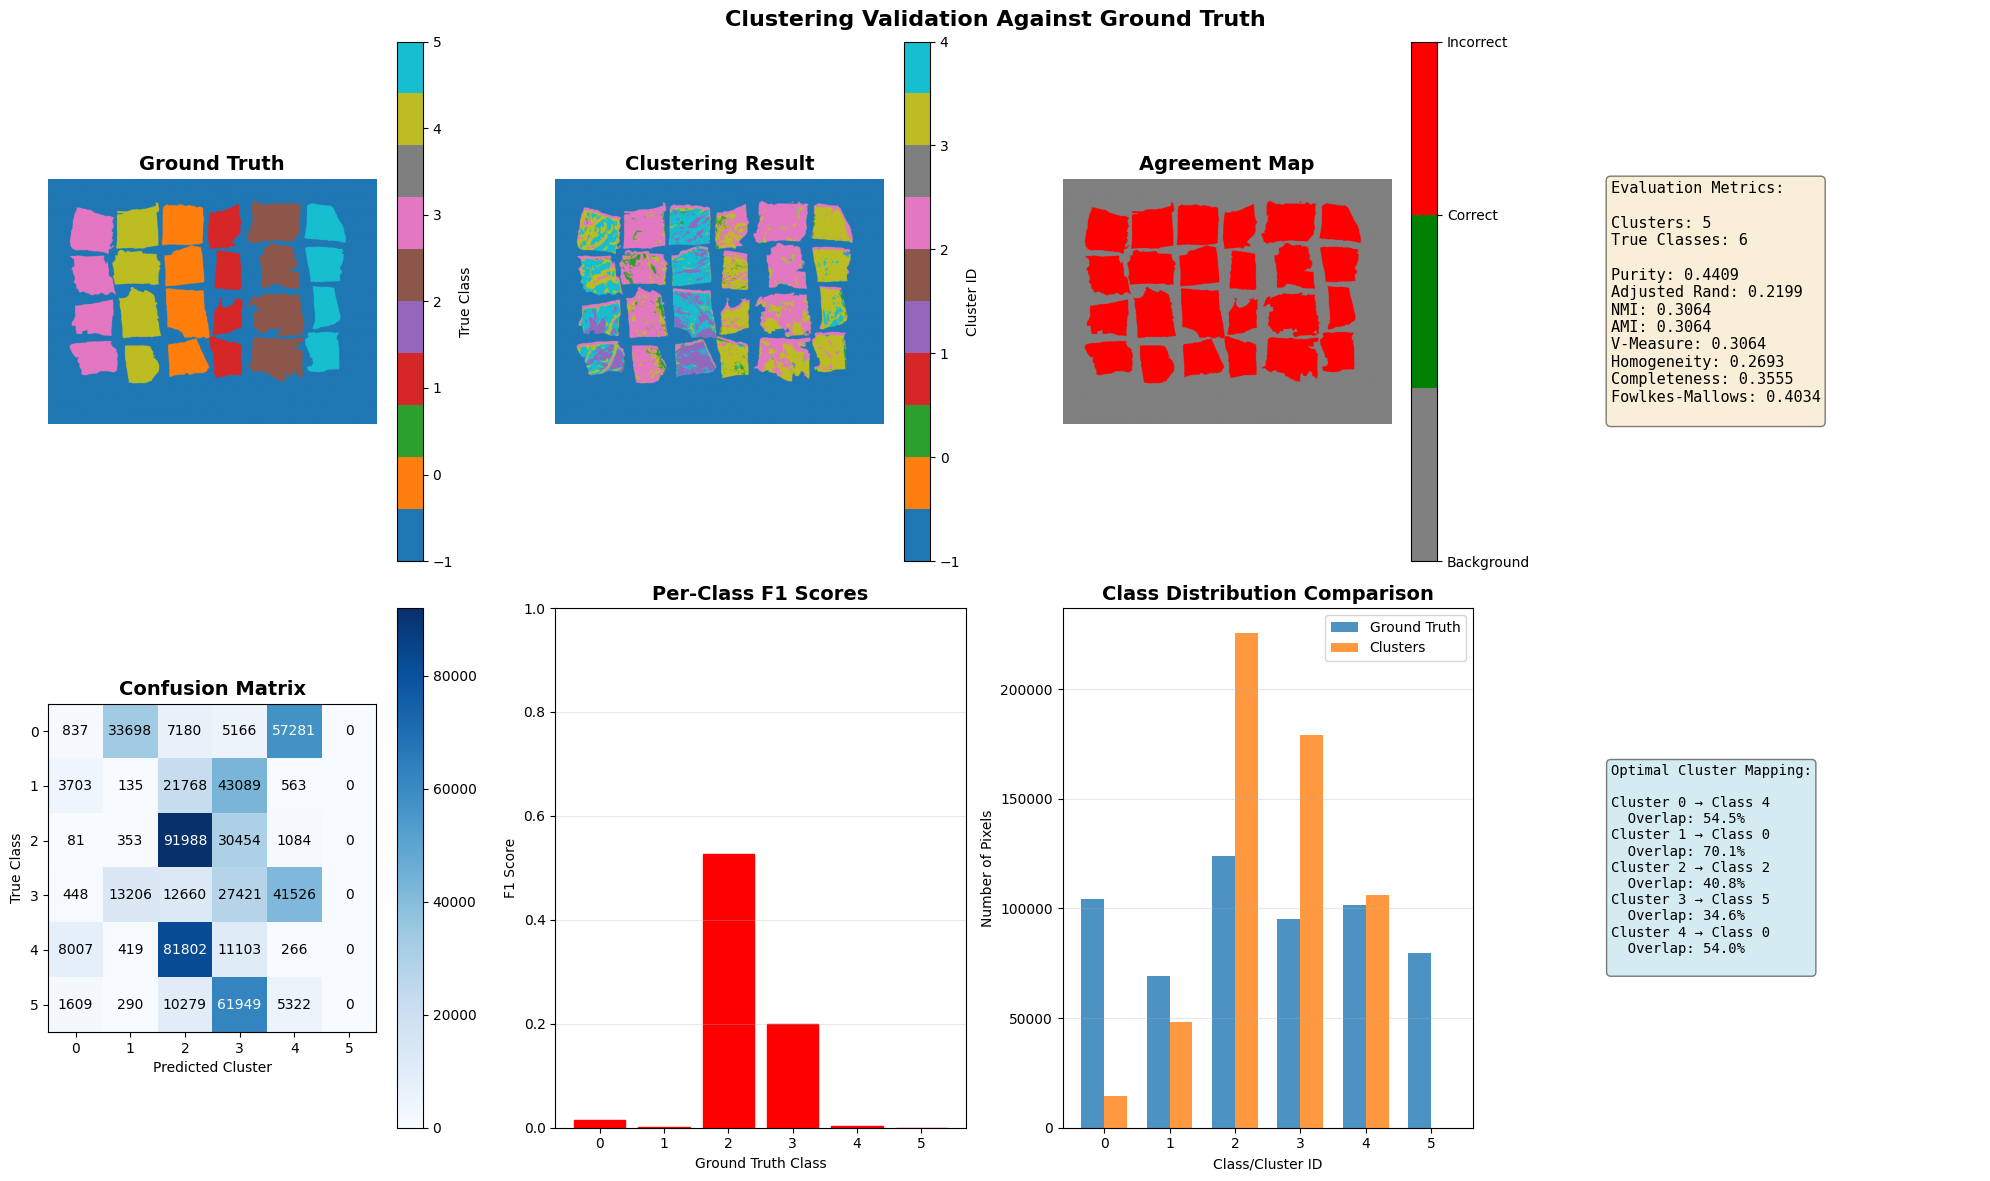

In [35]:
# Create comprehensive visualization comparing clustering vs ground truth
visualize_clustering_vs_ground_truth(
    cluster_map,
    ground_truth,
    accuracy_metrics,
    color_mapping=color_mapping
)

Number of true lichen classes: 6
Testing k values: [4, 5, 6, 7, 8, 9]

Testing k = 4

Performing kmeans clustering with 4 clusters...
Clustering on 573687 samples with 192 features
Running KMeans...
KMeans inertia: 34485110.43
Calculating clustering metrics...
Silhouette Score: 0.3613
Davies-Bouldin Score: 0.9668
Calinski-Harabasz Score: 419567.30

Cluster distribution:
  Cluster 0: 172213 pixels (30.0%)
  Cluster 1: 272753 pixels (47.5%)
  Cluster 2: 113399 pixels (19.8%)
  Cluster 3: 15322 pixels (2.7%)
Ground Truth Purity: 0.4505
Ground Truth ARI: 0.2479

Testing k = 5

Performing kmeans clustering with 5 clusters...
Clustering on 573687 samples with 192 features
Running KMeans...
KMeans inertia: 30009681.79
Calculating clustering metrics...
Silhouette Score: 0.2927
Davies-Bouldin Score: 1.1087
Calinski-Harabasz Score: 382991.97

Cluster distribution:
  Cluster 0: 14685 pixels (2.6%)
  Cluster 1: 48101 pixels (8.4%)
  Cluster 2: 225677 pixels (39.3%)
  Cluster 3: 179182 pixels (31.2

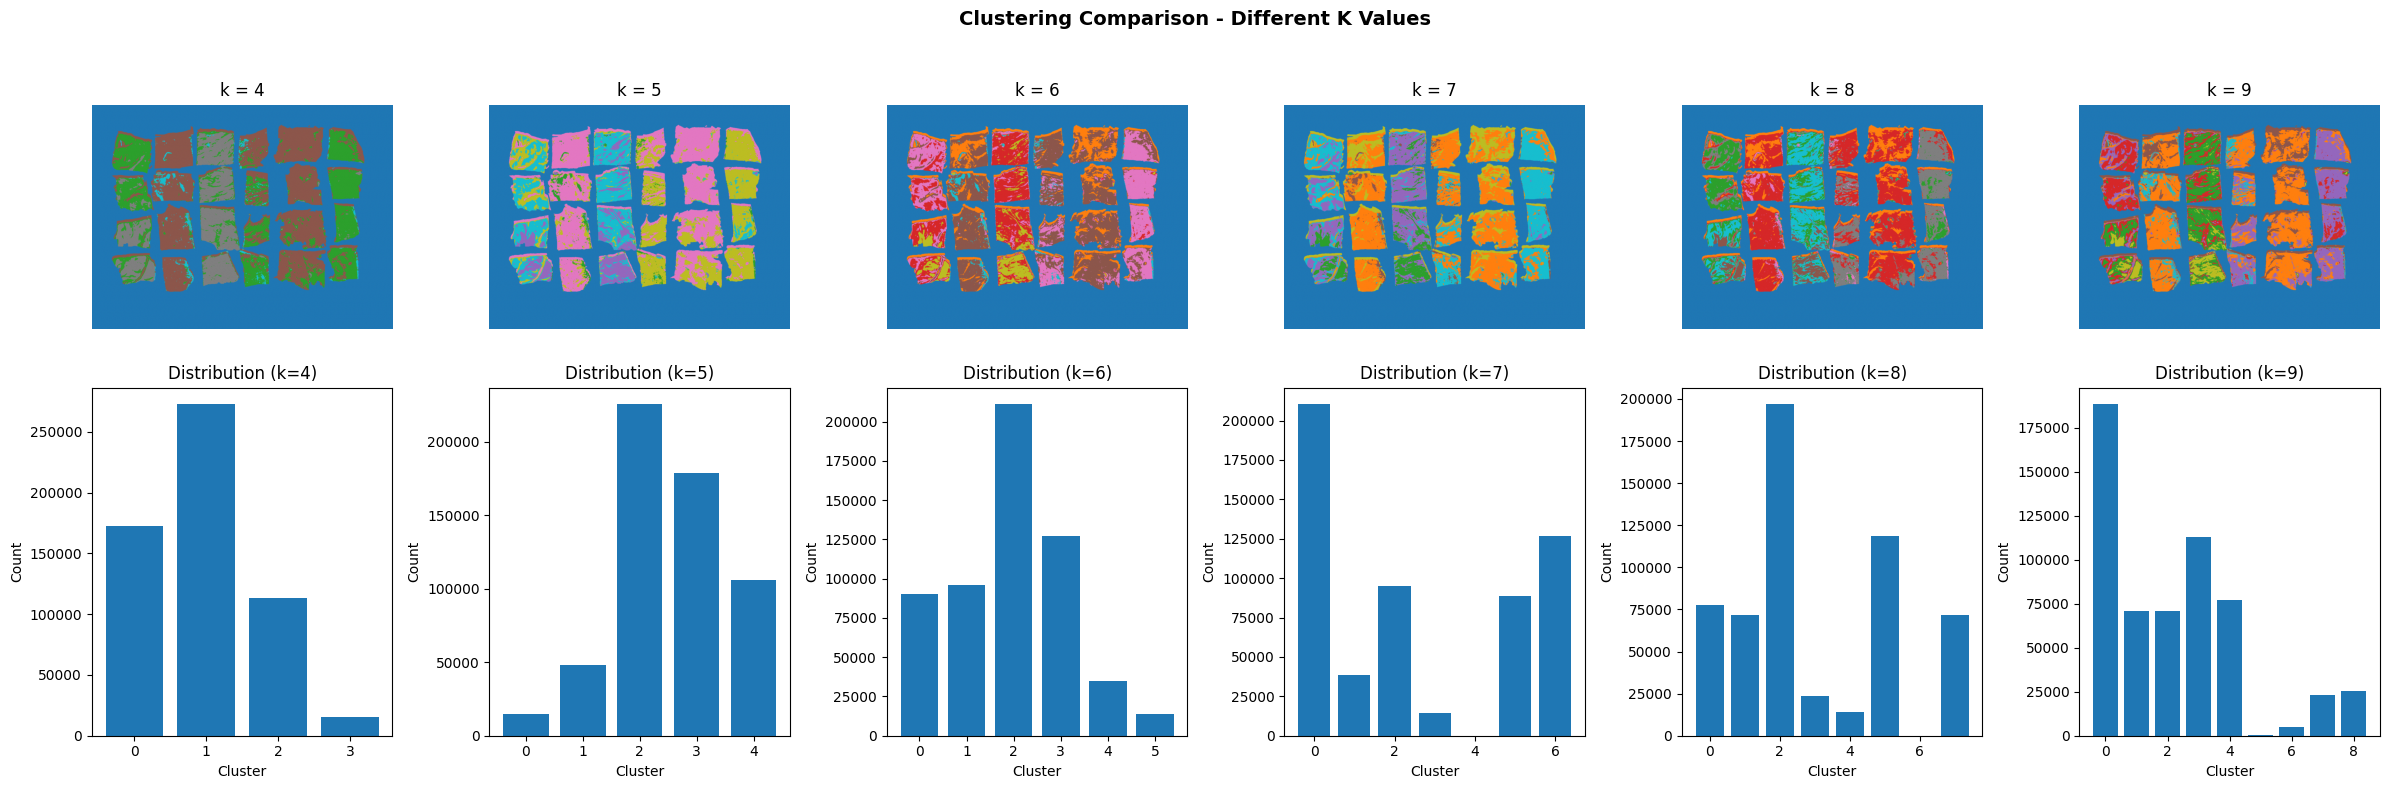

Saved metrics comparison to C:\Users\meloy\PycharmProjects\Capstone\wavelength_analysis\concatenation_results\k_comparison_metrics.png


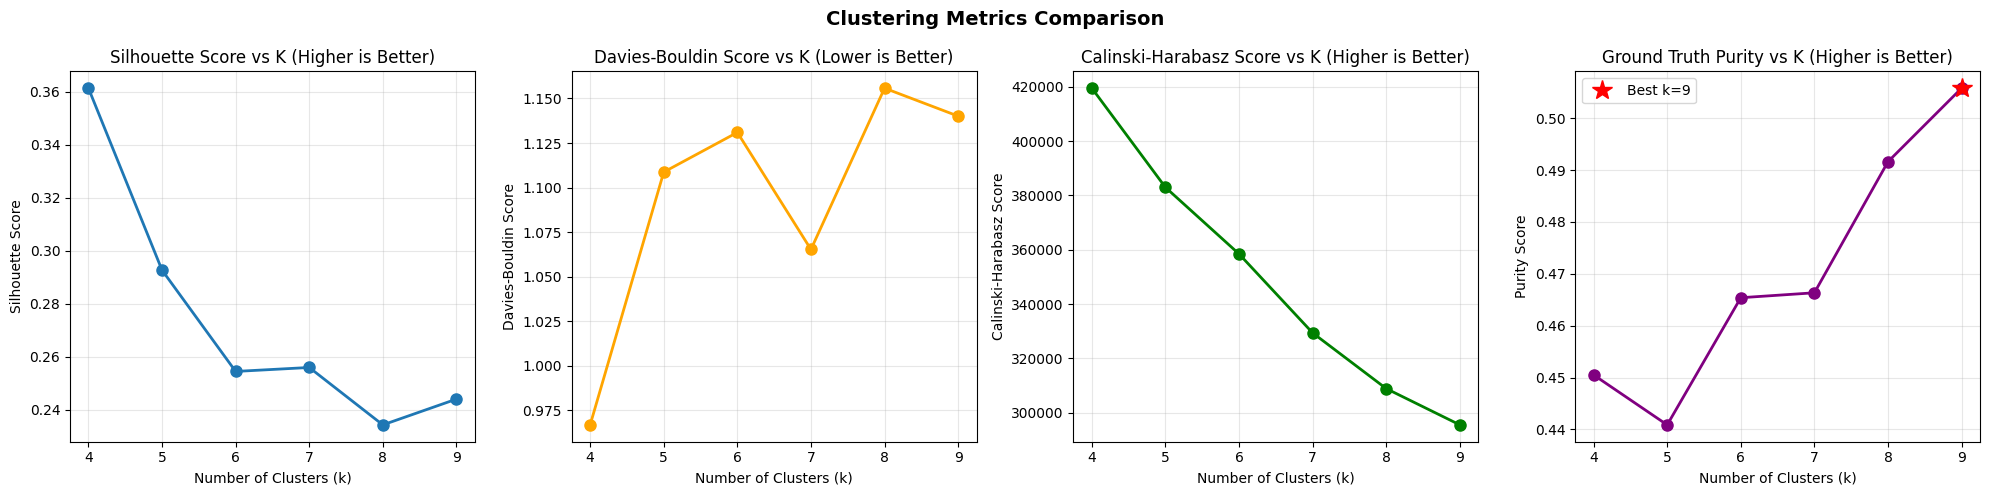


Optimal k based on Silhouette Score: 4


In [36]:
# Test different k values with ground truth validation
# First, let's reload the module to get the updated function
import importlib
import sys

# Remove the module from cache if it exists
if 'concatenation_clustering' in sys.modules:
    del sys.modules['concatenation_clustering']
if 'wavelength_analysis.concatenation_clustering' in sys.modules:
    del sys.modules['wavelength_analysis.concatenation_clustering']

# Import the updated function
from concatenation_clustering import compare_clustering_k_values

# Test k values around the number of ground truth classes
n_true_classes = len(lichen_colors)
k_values = list(range(max(2, n_true_classes - 2), n_true_classes + 4))

print(f"Number of true lichen classes: {n_true_classes}")
print(f"Testing k values: {k_values}")

# This will test each k value and show ground truth validation metrics
comparison_results = compare_clustering_k_values(
    df,
    valid_mask,
    metadata,
    k_values=k_values,
    ground_truth=ground_truth,
    save_dir=output_dir
)

In [37]:
# Manual k-value comparison with ground truth validation
from concatenation_clustering import perform_clustering, reconstruct_cluster_map

n_true_classes = len(lichen_colors)
k_values = list(range(max(2, n_true_classes - 1), n_true_classes + 3))

print(f"Number of true lichen classes: {n_true_classes}")
print(f"Testing k values: {k_values}")

results = {}
ground_truth_metrics = {}

# Test each k value
for k in k_values:
    print(f"\nTesting k={k}...")
    
    # Perform clustering
    labels, metrics = perform_clustering(
        df,
        n_clusters=k,
        method='kmeans',
        use_pca=False
    )
    
    # Reconstruct cluster map
    cluster_map_k = reconstruct_cluster_map(labels, df, valid_mask, metadata)
    
    # Calculate ground truth accuracy
    gt_metrics = calculate_clustering_accuracy(cluster_map_k, ground_truth, valid_mask)
    
    # Store results
    results[k] = {
        'cluster_map': cluster_map_k,
        'labels': labels,
        'metrics': metrics,
        'ground_truth_metrics': gt_metrics
    }
    
    # Print key metrics
    print(f"  Silhouette Score: {metrics.get('silhouette_score', 0):.4f}")
    print(f"  Ground Truth Purity: {gt_metrics.get('purity', 0):.4f}")
    print(f"  Ground Truth ARI: {gt_metrics.get('adjusted_rand_score', 0):.4f}")

print("\nK-value comparison completed!")

Number of true lichen classes: 6
Testing k values: [5, 6, 7, 8]

Testing k=5...

Performing kmeans clustering with 5 clusters...
Clustering on 573687 samples with 192 features
Running KMeans...
KMeans inertia: 30009681.79
Calculating clustering metrics...
Silhouette Score: 0.2911
Davies-Bouldin Score: 1.1087
Calinski-Harabasz Score: 382991.97

Cluster distribution:
  Cluster 0: 14685 pixels (2.6%)
  Cluster 1: 48101 pixels (8.4%)
  Cluster 2: 225677 pixels (39.3%)
  Cluster 3: 179182 pixels (31.2%)
  Cluster 4: 106042 pixels (18.5%)
  Silhouette Score: 0.2911
  Ground Truth Purity: 0.4409
  Ground Truth ARI: 0.2199

Testing k=6...

Performing kmeans clustering with 6 clusters...
Clustering on 573687 samples with 192 features
Running KMeans...
KMeans inertia: 26709055.72
Calculating clustering metrics...
Silhouette Score: 0.2593
Davies-Bouldin Score: 1.1310
Calinski-Harabasz Score: 358434.97

Cluster distribution:
  Cluster 0: 90076 pixels (15.7%)
  Cluster 1: 96196 pixels (16.8%)
  Clu

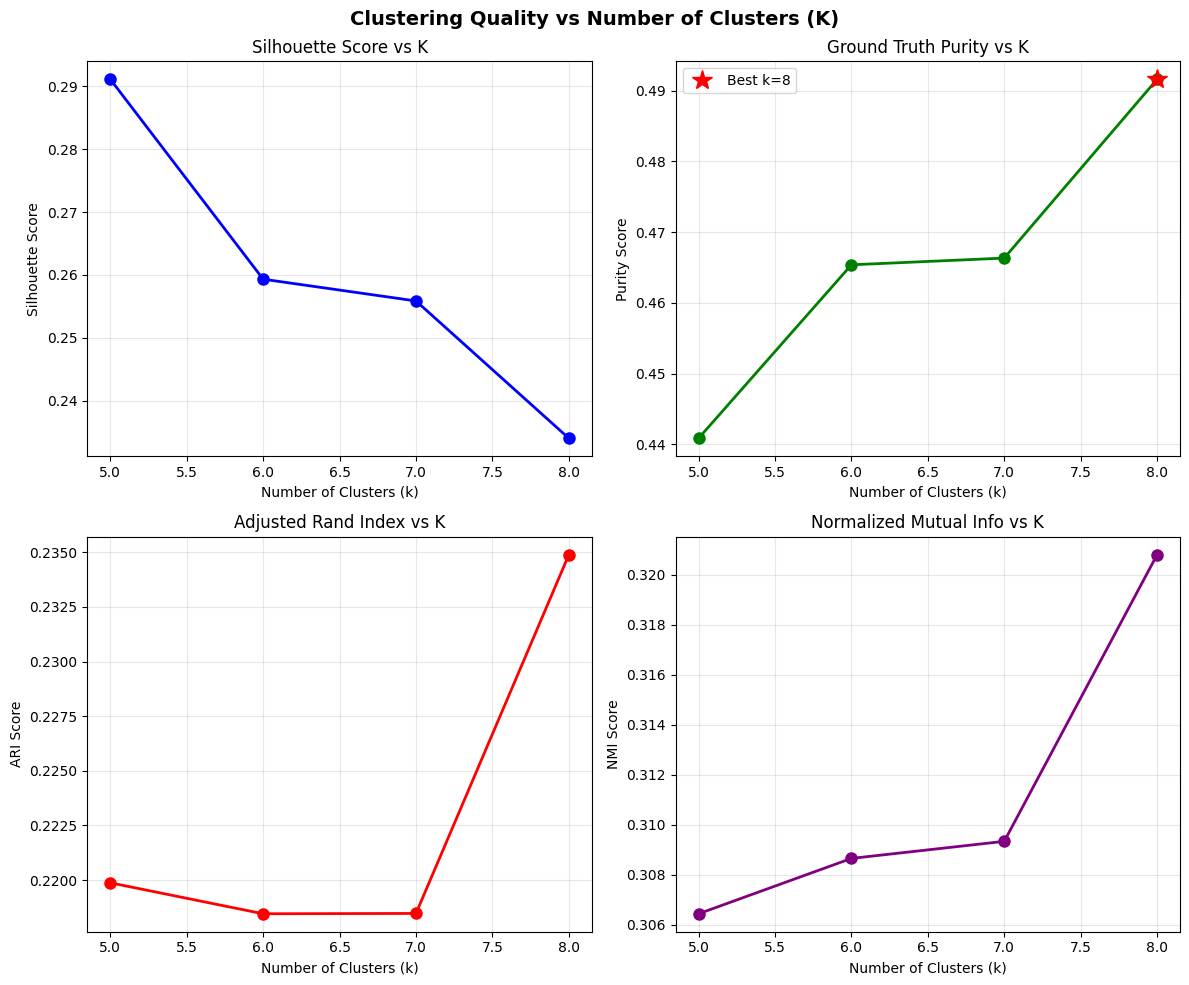


Optimal k based on ground truth purity: 8
Best purity score: 0.4916


In [38]:
# Visualize k-value comparison results
import matplotlib.pyplot as plt

# Extract metrics for plotting
silhouette_scores = []
purity_scores = []
ari_scores = []
nmi_scores = []

for k in k_values:
    metrics = results[k]['metrics']
    gt_metrics = results[k]['ground_truth_metrics']
    
    silhouette_scores.append(metrics.get('silhouette_score', 0))
    purity_scores.append(gt_metrics.get('purity', 0))
    ari_scores.append(gt_metrics.get('adjusted_rand_score', 0))
    nmi_scores.append(gt_metrics.get('normalized_mutual_info', 0))

# Create comparison plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Silhouette score
axes[0, 0].plot(k_values, silhouette_scores, 'o-', linewidth=2, markersize=8, color='blue')
axes[0, 0].set_title('Silhouette Score vs K')
axes[0, 0].set_xlabel('Number of Clusters (k)')
axes[0, 0].set_ylabel('Silhouette Score')
axes[0, 0].grid(True, alpha=0.3)

# Purity score
axes[0, 1].plot(k_values, purity_scores, 'o-', linewidth=2, markersize=8, color='green')
axes[0, 1].set_title('Ground Truth Purity vs K')
axes[0, 1].set_xlabel('Number of Clusters (k)')
axes[0, 1].set_ylabel('Purity Score')
axes[0, 1].grid(True, alpha=0.3)
# Mark best k
best_k_idx = np.argmax(purity_scores)
best_k = k_values[best_k_idx]
axes[0, 1].plot(best_k, purity_scores[best_k_idx], 'r*', markersize=15, label=f'Best k={best_k}')
axes[0, 1].legend()

# ARI score
axes[1, 0].plot(k_values, ari_scores, 'o-', linewidth=2, markersize=8, color='red')
axes[1, 0].set_title('Adjusted Rand Index vs K')
axes[1, 0].set_xlabel('Number of Clusters (k)')
axes[1, 0].set_ylabel('ARI Score')
axes[1, 0].grid(True, alpha=0.3)

# NMI score
axes[1, 1].plot(k_values, nmi_scores, 'o-', linewidth=2, markersize=8, color='purple')
axes[1, 1].set_title('Normalized Mutual Info vs K')
axes[1, 1].set_xlabel('Number of Clusters (k)')
axes[1, 1].set_ylabel('NMI Score')
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle('Clustering Quality vs Number of Clusters (K)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\nOptimal k based on ground truth purity: {best_k}")
print(f"Best purity score: {purity_scores[best_k_idx]:.4f}")

Detailed analysis for best k=8:
  Purity: 0.4916
  ARI: 0.2349
  NMI: 0.3208
  V-Measure: 0.3208
  Homogeneity: 0.3145
  Completeness: 0.3273


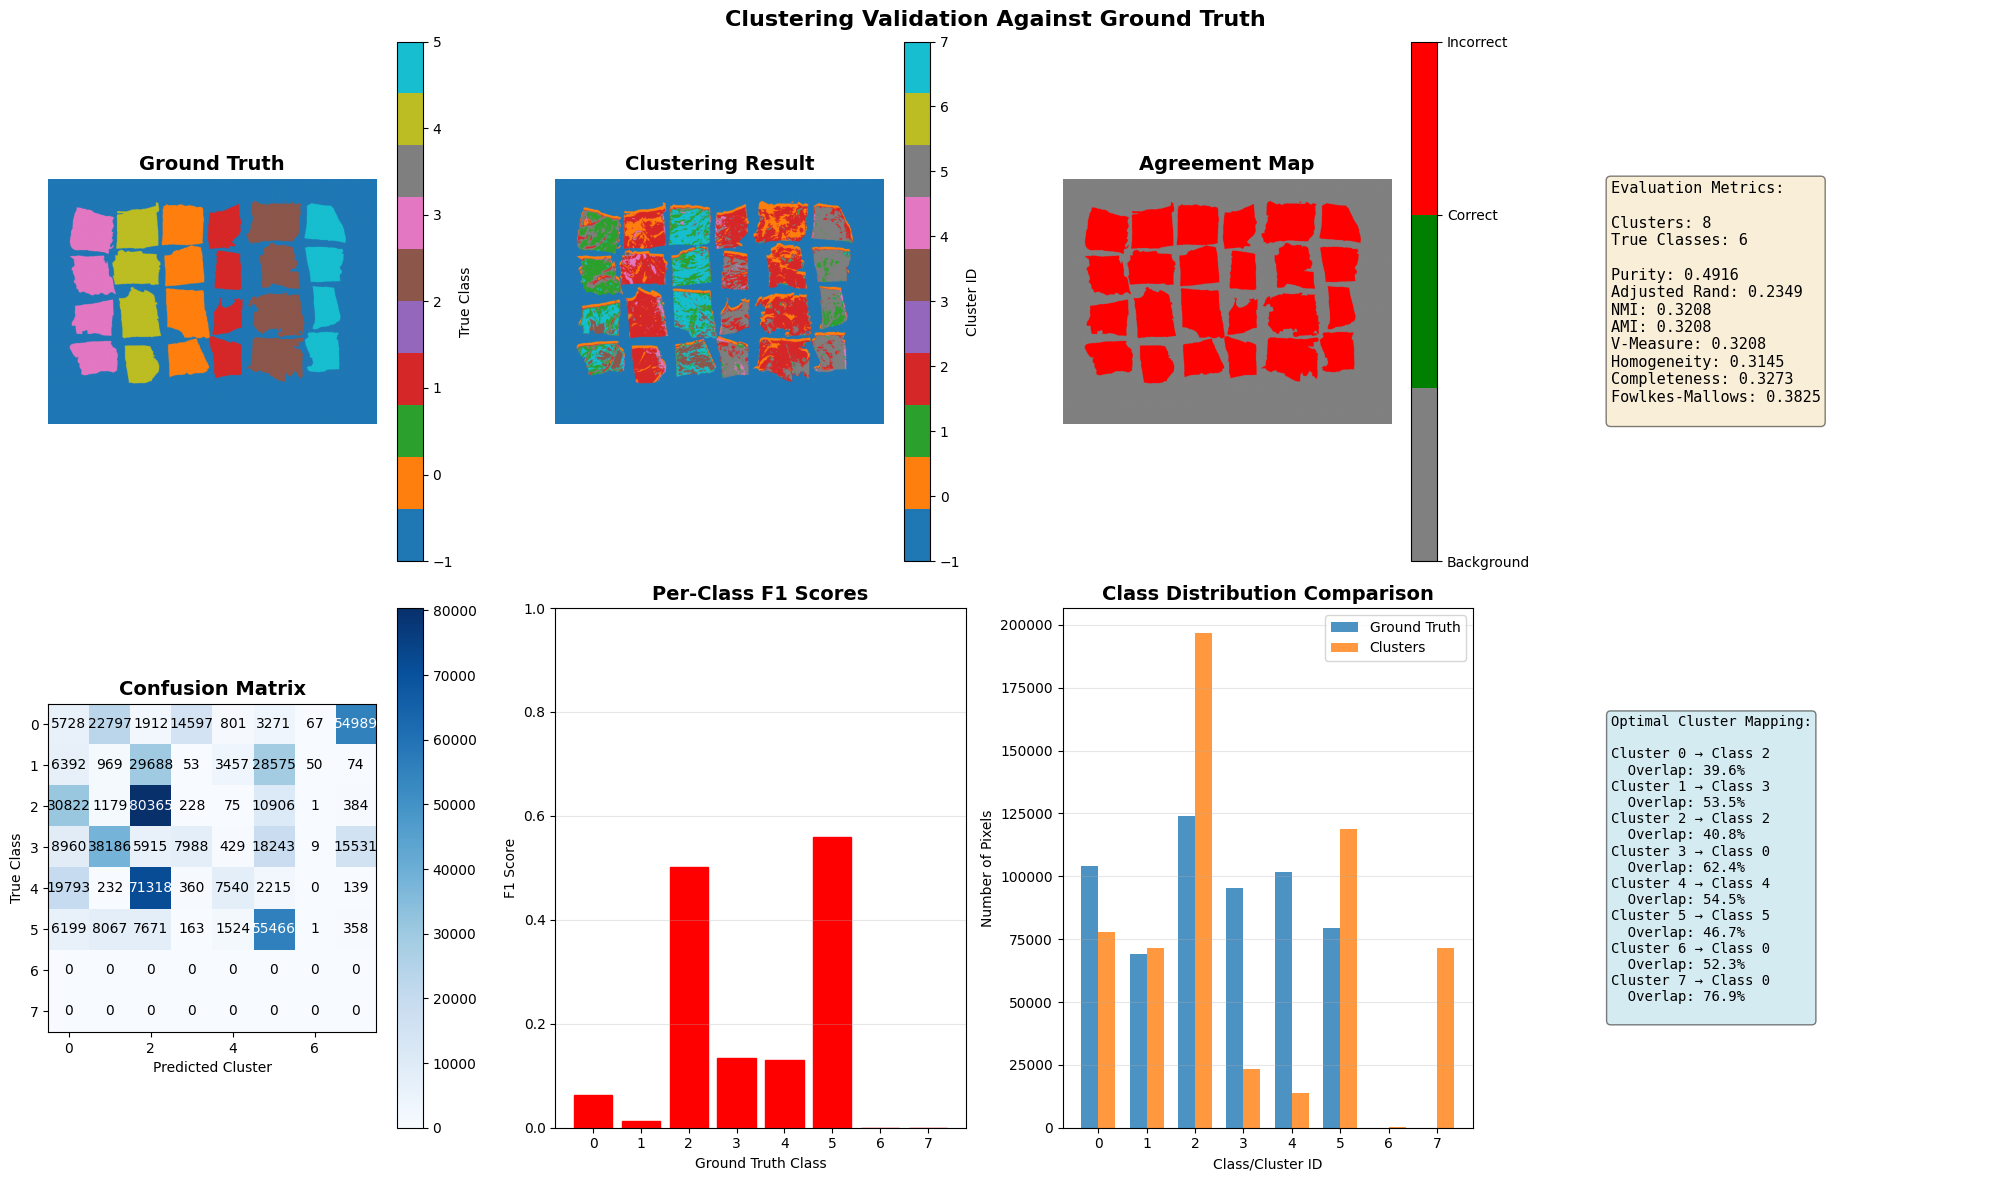

In [39]:
# Show detailed visualization for the best k
best_cluster_map = results[best_k]['cluster_map']
best_gt_metrics = results[best_k]['ground_truth_metrics']

print(f"Detailed analysis for best k={best_k}:")
print(f"  Purity: {best_gt_metrics.get('purity', 0):.4f}")
print(f"  ARI: {best_gt_metrics.get('adjusted_rand_score', 0):.4f}")
print(f"  NMI: {best_gt_metrics.get('normalized_mutual_info', 0):.4f}")
print(f"  V-Measure: {best_gt_metrics.get('v_measure', 0):.4f}")
print(f"  Homogeneity: {best_gt_metrics.get('homogeneity', 0):.4f}")
print(f"  Completeness: {best_gt_metrics.get('completeness', 0):.4f}")

# Create detailed visualization
visualize_clustering_vs_ground_truth(
    best_cluster_map,
    ground_truth,
    best_gt_metrics,
    color_mapping=color_mapping
)